In [1]:
using DifferentialEquations, Plots
gr()

Plots.GRBackend()

In [2]:
# Parameters
m1, m2 = 1.0, 1.0
l1, l2 = 1.0, 1.0
g = 9.81

# Double pendulum ODE
function double_pendulum!(du, u, p, t)
    θ1, ω1, θ2, ω2 = u
    Δθ = θ1 - θ2

    # Angular accelerations (simplified via linear algebra)
    den = m1 + m2 * sin(Δθ)^2
    du[1] = ω1
    du[2] = (-m2 * l2 * ω2^2 * sin(Δθ) * cos(Δθ) - (m1 + m2) * g * sin(θ1) + m2 * g * sin(θ2) * cos(Δθ)) / (l1 * den)
    du[3] = ω2
    du[4] = (l1 * ω1^2 * sin(Δθ) - g * sin(θ2) + (m1 + m2) * g * sin(θ1) * cos(Δθ) / m2) / (l2 * den)
end

# Initial conditions: θ1=π/2, θ2=π/2, ω1=ω2=0
u0 = [π/2, 0.0, π/2, 0.0]
tspan = (0.0, 3.0)
prob = ODEProblem(double_pendulum!, u0, tspan, saveat=0.01)
sol = solve(prob, Tsit5());

In [3]:
θ1 = [sol.u[i][1] for i in 1:length(sol.t)]
θ2 = [sol.u[i][3] for i in 1:length(sol.t)]

# Torus parameters
R, r = 2.0, 1.0

# 3D Torus coordinates
x = (R .+ r .* cos.(θ2)) .* cos.(θ1)
y = (R .+ r .* cos.(θ2)) .* sin.(θ1)
z = r .* sin.(θ2);

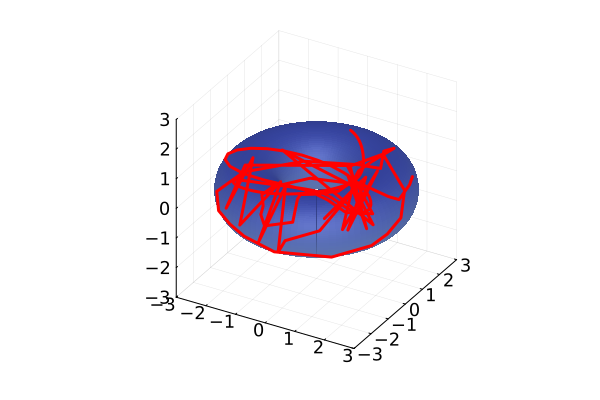

In [4]:
# theme(:dao)

# Plot the torus
ϕ = LinRange(-π, π, 100)
ψ = LinRange(-π, π, 100)
X = (R .+ r .* cos.(ψ')) .* cos.(ϕ)
Y = (R .+ r .* cos.(ψ')) .* sin.(ϕ)
Z = r .* sin.(ψ') .* ones(length(ϕ))

surface(X, Y, Z, alpha=0.3, c=:blues, legend=false)
plot!(x, y, z, linewidth=3, color=:red, label="Trajectory", 
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    )
xlims!(-(R + r), (R + r))
ylims!(-(R + r), (R + r))
zlims!(-(R + r), (R + r))